In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot
def add_weight(trueE, trueTheta):
    rootfile = "/home/zhonghua/data/exposure.root"
    with uproot.open(rootfile) as f:
        hWeight = f["hWeight"]
        edges_E = hWeight.axes[0].edges()  # Energy bin edges
        edges_Zen = hWeight.axes[1].edges()  # Zenith bin edges
        weights_2d = hWeight.values()
    nTbin = len(edges_Zen) - 1
    event_weights = np.zeros(len(trueE))
    for i in range(len(trueE)):
        E = trueE[i]/1e3
        th = trueTheta[i]*180/np.pi  # 转为度
        if E <= 0: 
            continue
        logE = np.log10(E)
        i_E = np.digitize(logE, edges_E) - 1
        i_zen = np.digitize(th, edges_Zen) - 1
        if i_zen < 0 or i_zen >= nTbin:
            continue
        coefficient = (5332800*0.33243)/313465 / (1000**2*np.pi)*(480**2-260**2)*np.pi/86400
        event_weights[i] = weights_2d[i_E, i_zen]/10*coefficient
    print(np.sum(event_weights))
    return event_weights

def load_npz_data(file_path):
    """
    npz data 已经经过了半径250-550筛选,以及重建角度/重建能量的筛选/还有NpE3>80的筛选\n
    所以接下来需要的是 更严格的cut以及age,Rmean,Rue的筛选.
    """
    data = np.load(file_path, allow_pickle=True)
    param_names = data['param_names']
    params = data['params']
    data_df=pd.DataFrame(params,columns=param_names)
    rec_x=pd.to_numeric(data_df['rec_x'], errors='coerce')
    rec_y=pd.to_numeric(data_df['rec_y'], errors='coerce')
    data_df['rec_r']=np.sqrt(rec_x**2+rec_y**2)
    data_df["weight"]=add_weight(data_df["trueE"], data_df["theta"])
    return data_df 

EF_Proton_df = load_npz_data("/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/filted_EF_Proton_4e13_1e15_dataset.npz")
QF_Proton_df = load_npz_data("/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/filted_QF_Proton_4e13_1e15_dataset.npz")
# SF_Proton_df = load_npz_data("/home/zhonghua/data/Dataset_Filted/CosmicRay/Npz/filted_SF_Proton_4e13_1e15_dataset.npz")
print(EF_Proton_df.shape)
print(QF_Proton_df.shape)
# print(SF_Proton_df.shape)


9.994030837421295
9.406505767949549
(55475, 18)
(53035, 18)


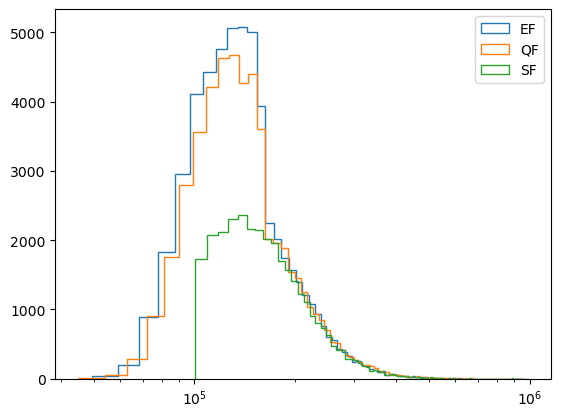

In [ ]:
plt.hist(EF_Proton_df["trueE"],bins=100,histtype="step",label="EF")
plt.hist(QF_Proton_df["trueE"],bins=100,histtype="step",label="QF")
# plt.hist(SF_Proton_df["trueE"],bins=100,histtype="step",label="SF")
plt.xscale("log")
plt.legend()
plt.show()

In [20]:
file = uproot.open("/home/zhonghua/Filt_Event/model_validation/exposure.root")
h1 = file["h1"]
h2 = file["h2"]
# 获取直方图的所有数据
values = h1.values()        # bin内容（纵坐标）
h2_values = h2.values()        # bin内容（纵坐标）
edges = h1.axis().edges()   # bin边界（横坐标）
h2_edges = h2.axis().edges()   # bin边界（横坐标）
centers = h1.axis().centers()  # bin中心
h2_centers = h2.axis().centers()  # bin中心

np.sum(h2_values[10:40])/np.sum(h2_values)

0.33243210000000006